# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
import helper
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""


helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

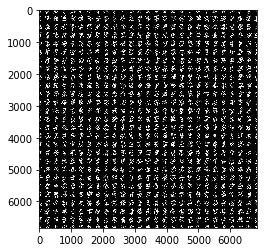

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg')), 28, 28, 'RGB')#[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

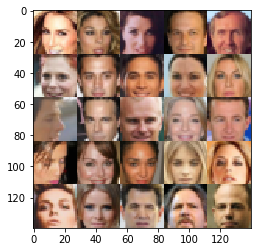

In [3]:
show_n_images = 25



#DON'T MODIFY ANYTHING IN THIS CELL

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

In [ ]:
# Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:

#DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import sys
"""
print(sys.version)
"""
import tensorflow as tf
"""

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

3.5.4 (v3.5.4:3f56838, Aug  8 2017, 02:17:05) [MSC v.1900 64 bit (AMD64)]
TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [1]:
#import problem_unittests as tests
data_dir = './data'
import helper
from distutils.version import LooseVersion
import warnings
import sys
import tensorflow as tf
import os
from glob import glob
from matplotlib import pyplot

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real   = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real') 
    inputs_z      = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z') 
    learning_rate = tf.placeholder(tf.float32, name='learning_rate') 
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_model_inputs(model_inputs)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [2]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):        
        conv1 = tf.layers.conv2d(images, 32, 3, 2, 'SAME')
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(lrelu1, 64, 3, 2, 'SAME')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        drop = tf.layers.dropout(lrelu2, rate=0.2)

        conv3 = tf.layers.conv2d(drop, 128, 3, 1, 'SAME')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        
        features = tf.reduce_mean(lrelu3, (1, 2))        
        logits = tf.layers.dense(features, 1)
        
        out = tf.sigmoid(logits)
        
        return out, logits
        

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_discriminator(discriminator, tf)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [3]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=False if is_train==True else True):
        x1 = tf.layers.dense(z, 7 * 7 * 512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 3, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.layers.dropout(x2, rate=0.5)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 3, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.layers.dropout(x3, rate=0.5)
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 3, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 3, strides=2, padding='same')
        
        out = tf.tanh(logits)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_generator(generator, tf)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [4]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                              labels=tf.ones_like(d_logits_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                              labels=tf.zeros_like(d_logits_real)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
                 tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                         labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_model_loss(model_loss)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [5]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_model_opt(model_opt, tf)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = 'gray'#None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [2]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    #_, img_width, img_height, img_channels = data_shape
    
    with tf.Graph().as_default():#//replaces 'tf.reset_default_graph()'
        input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
        d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

        steps = 0
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for epoch_i in range(epoch_count):
                for batch_images in get_batches(batch_size):
                    # TODO: Train Model
                    batch_images *= 2
                    steps += 1
                    batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                    _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                    _ = sess.run(g_opt, feed_dict={input_z: batch_z})

                    #if steps % 10 == 0:
                    # At the end of every 10 epochs, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g),
                          "Sum Loss: {:.4f}".format(train_loss_g+train_loss_d))

                    #if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)


# MNIST DEBUGGING

In [1]:
data_dir = './data'
import helper
from distutils.version import LooseVersion
import warnings
import sys
import tensorflow as tf
import os
from glob import glob
from matplotlib import pyplot
import numpy as np
import time
from PIL import Image

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real   = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real') 
    inputs_z      = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z') 
    learning_rate = tf.placeholder(tf.float32, name='learning_rate') 
    
    return inputs_real, inputs_z, learning_rate

def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):        
        conv1 = tf.layers.conv2d(images, 32, 3, 2, 'SAME')
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(lrelu1, 64, 3, 2, 'SAME')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        drop = tf.layers.dropout(lrelu2, rate=0.2)

        conv3 = tf.layers.conv2d(drop, 128, 3, 1, 'SAME')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        
        features = tf.reduce_mean(lrelu3, (1, 2))        
        logits = tf.layers.dense(features, 1)
        
        out = tf.sigmoid(logits)
        
        return out, logits

def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=False if is_train==True else True):
        x1 = tf.layers.dense(z, 7 * 7 * 512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 3, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.layers.dropout(x2, rate=0.5)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 3, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.layers.dropout(x3, rate=0.5)
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 3, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 3, strides=2, padding='same')
        
        out = tf.tanh(logits)
        
        return out

def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                              labels=tf.ones_like(d_logits_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                              labels=tf.zeros_like(d_logits_real)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
                 tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                         labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = 'gray'#None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

def generate_adversarial_images(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = 'gray'#None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})
    return samples

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    #_, img_width, img_height, img_channels = data_shape
    
    saver = tf.train.Saver() #for SAVING GAN model when 10epochs of training are done
    
    with tf.Graph().as_default():#//replaces 'tf.reset_default_graph()'
        input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
        d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

        steps = 0
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            startTime = time.time()
            for epoch_i in range(epoch_count):
                #if epoch_i == 11:
                #    saver.save(sess, '10epochs-GAN')
                epochStartTime = time.time()
                curEpochSteps = 0
                for batch_images in get_batches(batch_size):
                    # TODO: Train Model
                    batch_images *= 2
                    curEpochSteps +=1
                    steps += 1
                    batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                    _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                    _ = sess.run(g_opt, feed_dict={input_z: batch_z})

                    if steps % 10 == 0:
                        # At the end of every 10 epochs, get the losses and print them out
                        train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                        train_loss_g = g_loss.eval({input_z: batch_z})

                        print("\nEpoch {}/{}...".format(epoch_i+1, epochs),
                        "Current Number of Steps in Epoch: {}".format(curEpochSteps),
                        "Cumulative Steps for all Epochs: {}".format(steps),
                        "Discriminator Loss: {:.4f}...".format(train_loss_d),
                        "Generator Loss: {:.4f}".format(train_loss_g),
                        "Sum Loss: {:.4f}".format(train_loss_g+train_loss_d),
                        "Epoch Time: {}seconds".format(time.time()-epochStartTime))

                    if steps % 100 == 0:
                        show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                print("\nTOTAL EPOCH {} TIME: {}seconds".format(epoch_i+1, time.time()-epochStartTime),
                      "\nTOTAL ELAPSED TIME: {}seconds".format(time.time()-startTime), 
                     "\nTOTAL NUMBER OF STEPS FOR EPOCH {}: {}".format(epoch_i+1, curEpochSteps),
                     "\nCUMULATIVE STEPS FOR ALL EPOCHS: {}".format(steps))
                
            
            generate_adversarial_images(sess, 25, input_z, data_shape[3], data_image_mode)

c:\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [2]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.5

#CLEARS ALL INTERACTIVE SESSIONS 
#(TO AVOID error "failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED")
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1 #DEBUGGING 

#mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'RGB')
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg'))[:30000])
print(mnist_dataset.shape)

with tf.get_default_graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)


(30000, 28, 28, 1)


ValueError: No variables to save

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.


Epoch 1/1... Current Number of Steps in Epoch: 10 Cumulative Steps for all Epochs: 10 Discriminator Loss: 1.3809... Generator Loss: 0.5969 Sum Loss: 1.9778 Epoch Time: 5.327250242233276seconds

Epoch 1/1... Current Number of Steps in Epoch: 20 Cumulative Steps for all Epochs: 20 Discriminator Loss: 1.2915... Generator Loss: 0.7440 Sum Loss: 2.0356 Epoch Time: 9.216852903366089seconds

Epoch 1/1... Current Number of Steps in Epoch: 30 Cumulative Steps for all Epochs: 30 Discriminator Loss: 1.3524... Generator Loss: 0.8268 Sum Loss: 2.1792 Epoch Time: 13.109528064727783seconds

Epoch 1/1... Current Number of Steps in Epoch: 40 Cumulative Steps for all Epochs: 40 Discriminator Loss: 1.3703... Generator Loss: 0.8065 Sum Loss: 2.1767 Epoch Time: 16.942404747009277seconds

Epoch 1/1... Current Number of Steps in Epoch: 50 Cumulative Steps for all Epochs: 50 Discriminator Loss: 1.3662... Generator Loss: 0.8190 Sum Loss: 2.1852 Epoch Time: 20.812605381011963seconds

Epoch 1/1... Current Numbe

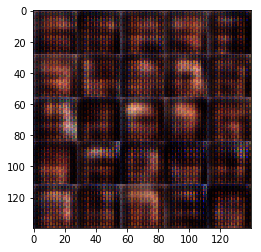


Epoch 1/1... Current Number of Steps in Epoch: 110 Cumulative Steps for all Epochs: 110 Discriminator Loss: 1.3730... Generator Loss: 0.7969 Sum Loss: 2.1699 Epoch Time: 44.87043523788452seconds

Epoch 1/1... Current Number of Steps in Epoch: 120 Cumulative Steps for all Epochs: 120 Discriminator Loss: 1.3720... Generator Loss: 0.7992 Sum Loss: 2.1712 Epoch Time: 48.89416694641113seconds

Epoch 1/1... Current Number of Steps in Epoch: 130 Cumulative Steps for all Epochs: 130 Discriminator Loss: 1.3834... Generator Loss: 0.7819 Sum Loss: 2.1653 Epoch Time: 53.18972182273865seconds

Epoch 1/1... Current Number of Steps in Epoch: 140 Cumulative Steps for all Epochs: 140 Discriminator Loss: 1.3663... Generator Loss: 0.7884 Sum Loss: 2.1547 Epoch Time: 57.5452778339386seconds

Epoch 1/1... Current Number of Steps in Epoch: 150 Cumulative Steps for all Epochs: 150 Discriminator Loss: 1.3830... Generator Loss: 0.7826 Sum Loss: 2.1656 Epoch Time: 62.15210938453674seconds

Epoch 1/1... Current

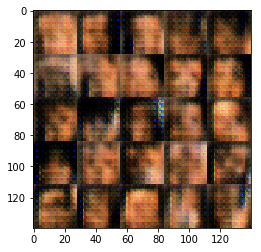


Epoch 1/1... Current Number of Steps in Epoch: 210 Cumulative Steps for all Epochs: 210 Discriminator Loss: 1.3114... Generator Loss: 0.7955 Sum Loss: 2.1070 Epoch Time: 88.30926728248596seconds

Epoch 1/1... Current Number of Steps in Epoch: 220 Cumulative Steps for all Epochs: 220 Discriminator Loss: 1.3418... Generator Loss: 0.7524 Sum Loss: 2.0942 Epoch Time: 92.88805031776428seconds

Epoch 1/1... Current Number of Steps in Epoch: 230 Cumulative Steps for all Epochs: 230 Discriminator Loss: 1.4020... Generator Loss: 0.9118 Sum Loss: 2.3137 Epoch Time: 97.22252893447876seconds

Epoch 1/1... Current Number of Steps in Epoch: 240 Cumulative Steps for all Epochs: 240 Discriminator Loss: 1.1701... Generator Loss: 0.8914 Sum Loss: 2.0614 Epoch Time: 101.24903345108032seconds

Epoch 1/1... Current Number of Steps in Epoch: 250 Cumulative Steps for all Epochs: 250 Discriminator Loss: 1.2973... Generator Loss: 0.7564 Sum Loss: 2.0537 Epoch Time: 105.4560329914093seconds

Epoch 1/1... Curre

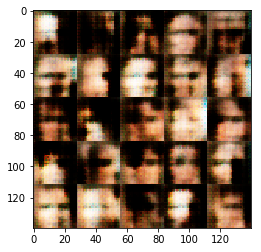


Epoch 1/1... Current Number of Steps in Epoch: 310 Cumulative Steps for all Epochs: 310 Discriminator Loss: 1.2463... Generator Loss: 0.8528 Sum Loss: 2.0991 Epoch Time: 130.8811616897583seconds

Epoch 1/1... Current Number of Steps in Epoch: 320 Cumulative Steps for all Epochs: 320 Discriminator Loss: 1.3309... Generator Loss: 0.8015 Sum Loss: 2.1324 Epoch Time: 135.41111183166504seconds

Epoch 1/1... Current Number of Steps in Epoch: 330 Cumulative Steps for all Epochs: 330 Discriminator Loss: 1.2808... Generator Loss: 0.9211 Sum Loss: 2.2019 Epoch Time: 139.46259307861328seconds

Epoch 1/1... Current Number of Steps in Epoch: 340 Cumulative Steps for all Epochs: 340 Discriminator Loss: 1.3186... Generator Loss: 0.8281 Sum Loss: 2.1467 Epoch Time: 143.7883427143097seconds

Epoch 1/1... Current Number of Steps in Epoch: 350 Cumulative Steps for all Epochs: 350 Discriminator Loss: 1.3783... Generator Loss: 0.7373 Sum Loss: 2.1157 Epoch Time: 148.16473150253296seconds

Epoch 1/1... Cur

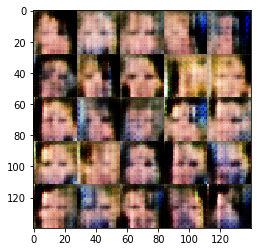


Epoch 1/1... Current Number of Steps in Epoch: 410 Cumulative Steps for all Epochs: 410 Discriminator Loss: 1.3918... Generator Loss: 0.7093 Sum Loss: 2.1011 Epoch Time: 174.13975381851196seconds

Epoch 1/1... Current Number of Steps in Epoch: 420 Cumulative Steps for all Epochs: 420 Discriminator Loss: 1.4155... Generator Loss: 0.7536 Sum Loss: 2.1691 Epoch Time: 178.6925563812256seconds

Epoch 1/1... Current Number of Steps in Epoch: 430 Cumulative Steps for all Epochs: 430 Discriminator Loss: 1.3871... Generator Loss: 0.7439 Sum Loss: 2.1310 Epoch Time: 183.0242669582367seconds

Epoch 1/1... Current Number of Steps in Epoch: 440 Cumulative Steps for all Epochs: 440 Discriminator Loss: 1.3681... Generator Loss: 0.7831 Sum Loss: 2.1512 Epoch Time: 187.19072127342224seconds

Epoch 1/1... Current Number of Steps in Epoch: 450 Cumulative Steps for all Epochs: 450 Discriminator Loss: 1.3749... Generator Loss: 0.8316 Sum Loss: 2.2066 Epoch Time: 191.31409001350403seconds

Epoch 1/1... Cur

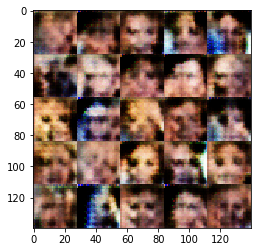


Epoch 1/1... Current Number of Steps in Epoch: 510 Cumulative Steps for all Epochs: 510 Discriminator Loss: 1.2834... Generator Loss: 0.8324 Sum Loss: 2.1158 Epoch Time: 215.37266993522644seconds

Epoch 1/1... Current Number of Steps in Epoch: 520 Cumulative Steps for all Epochs: 520 Discriminator Loss: 1.3629... Generator Loss: 0.7606 Sum Loss: 2.1234 Epoch Time: 219.82979607582092seconds

Epoch 1/1... Current Number of Steps in Epoch: 530 Cumulative Steps for all Epochs: 530 Discriminator Loss: 1.3943... Generator Loss: 0.7794 Sum Loss: 2.1737 Epoch Time: 224.2609508037567seconds

Epoch 1/1... Current Number of Steps in Epoch: 540 Cumulative Steps for all Epochs: 540 Discriminator Loss: 1.2886... Generator Loss: 0.8133 Sum Loss: 2.1019 Epoch Time: 228.71604084968567seconds

Epoch 1/1... Current Number of Steps in Epoch: 550 Cumulative Steps for all Epochs: 550 Discriminator Loss: 1.3546... Generator Loss: 0.7995 Sum Loss: 2.1542 Epoch Time: 233.14041233062744seconds

Epoch 1/1... Cu

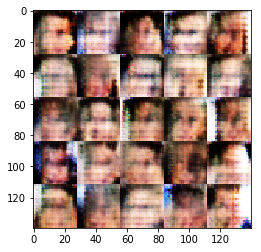


Epoch 1/1... Current Number of Steps in Epoch: 610 Cumulative Steps for all Epochs: 610 Discriminator Loss: 1.3201... Generator Loss: 0.8705 Sum Loss: 2.1906 Epoch Time: 257.95430517196655seconds

Epoch 1/1... Current Number of Steps in Epoch: 620 Cumulative Steps for all Epochs: 620 Discriminator Loss: 1.3487... Generator Loss: 0.7859 Sum Loss: 2.1345 Epoch Time: 261.99749779701233seconds

Epoch 1/1... Current Number of Steps in Epoch: 630 Cumulative Steps for all Epochs: 630 Discriminator Loss: 1.3378... Generator Loss: 0.7437 Sum Loss: 2.0815 Epoch Time: 266.54833149909973seconds

Epoch 1/1... Current Number of Steps in Epoch: 640 Cumulative Steps for all Epochs: 640 Discriminator Loss: 1.3049... Generator Loss: 0.7932 Sum Loss: 2.0982 Epoch Time: 270.8184030056seconds

Epoch 1/1... Current Number of Steps in Epoch: 650 Cumulative Steps for all Epochs: 650 Discriminator Loss: 1.3079... Generator Loss: 0.8071 Sum Loss: 2.1149 Epoch Time: 274.95465111732483seconds

Epoch 1/1... Curre

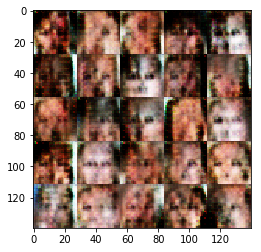


Epoch 1/1... Current Number of Steps in Epoch: 710 Cumulative Steps for all Epochs: 710 Discriminator Loss: 1.3331... Generator Loss: 0.8233 Sum Loss: 2.1564 Epoch Time: 300.63438630104065seconds

Epoch 1/1... Current Number of Steps in Epoch: 720 Cumulative Steps for all Epochs: 720 Discriminator Loss: 1.3107... Generator Loss: 0.8217 Sum Loss: 2.1324 Epoch Time: 305.1723988056183seconds

Epoch 1/1... Current Number of Steps in Epoch: 730 Cumulative Steps for all Epochs: 730 Discriminator Loss: 1.3803... Generator Loss: 0.7985 Sum Loss: 2.1788 Epoch Time: 309.2417576313019seconds

Epoch 1/1... Current Number of Steps in Epoch: 740 Cumulative Steps for all Epochs: 740 Discriminator Loss: 1.3716... Generator Loss: 0.7887 Sum Loss: 2.1603 Epoch Time: 313.4455578327179seconds

Epoch 1/1... Current Number of Steps in Epoch: 750 Cumulative Steps for all Epochs: 750 Discriminator Loss: 1.3295... Generator Loss: 0.7908 Sum Loss: 2.1203 Epoch Time: 317.98051142692566seconds

Epoch 1/1... Curr

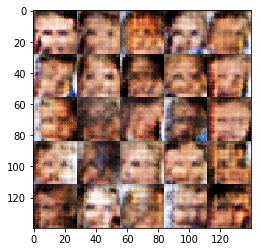


Epoch 1/1... Current Number of Steps in Epoch: 810 Cumulative Steps for all Epochs: 810 Discriminator Loss: 1.3347... Generator Loss: 0.7905 Sum Loss: 2.1251 Epoch Time: 344.0283172130585seconds

Epoch 1/1... Current Number of Steps in Epoch: 820 Cumulative Steps for all Epochs: 820 Discriminator Loss: 1.3350... Generator Loss: 0.8546 Sum Loss: 2.1896 Epoch Time: 348.48839831352234seconds

Epoch 1/1... Current Number of Steps in Epoch: 830 Cumulative Steps for all Epochs: 830 Discriminator Loss: 1.2917... Generator Loss: 0.8777 Sum Loss: 2.1695 Epoch Time: 352.876665353775seconds

Epoch 1/1... Current Number of Steps in Epoch: 840 Cumulative Steps for all Epochs: 840 Discriminator Loss: 1.3205... Generator Loss: 0.8147 Sum Loss: 2.1352 Epoch Time: 357.3566884994507seconds

Epoch 1/1... Current Number of Steps in Epoch: 850 Cumulative Steps for all Epochs: 850 Discriminator Loss: 1.4003... Generator Loss: 0.7666 Sum Loss: 2.1670 Epoch Time: 361.50863122940063seconds

Epoch 1/1... Curre

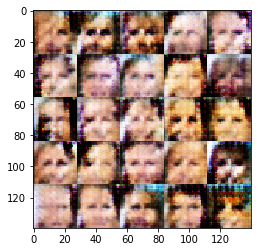


Epoch 1/1... Current Number of Steps in Epoch: 910 Cumulative Steps for all Epochs: 910 Discriminator Loss: 1.3726... Generator Loss: 0.7849 Sum Loss: 2.1576 Epoch Time: 387.06750440597534seconds

Epoch 1/1... Current Number of Steps in Epoch: 920 Cumulative Steps for all Epochs: 920 Discriminator Loss: 1.3660... Generator Loss: 0.8131 Sum Loss: 2.1792 Epoch Time: 391.09476494789124seconds

Epoch 1/1... Current Number of Steps in Epoch: 930 Cumulative Steps for all Epochs: 930 Discriminator Loss: 1.3691... Generator Loss: 0.8144 Sum Loss: 2.1835 Epoch Time: 395.57675647735596seconds

Epoch 1/1... Current Number of Steps in Epoch: 940 Cumulative Steps for all Epochs: 940 Discriminator Loss: 1.3785... Generator Loss: 0.8117 Sum Loss: 2.1902 Epoch Time: 400.2861680984497seconds

Epoch 1/1... Current Number of Steps in Epoch: 950 Cumulative Steps for all Epochs: 950 Discriminator Loss: 1.3055... Generator Loss: 0.8112 Sum Loss: 2.1167 Epoch Time: 404.8549551963806seconds

Epoch 1/1... Cur

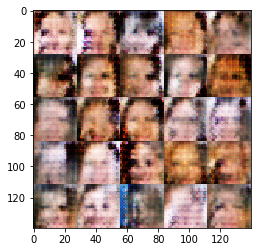


Epoch 1/1... Current Number of Steps in Epoch: 1010 Cumulative Steps for all Epochs: 1010 Discriminator Loss: 1.3815... Generator Loss: 0.8063 Sum Loss: 2.1878 Epoch Time: 431.49075150489807seconds

Epoch 1/1... Current Number of Steps in Epoch: 1020 Cumulative Steps for all Epochs: 1020 Discriminator Loss: 1.3516... Generator Loss: 0.7757 Sum Loss: 2.1273 Epoch Time: 435.5139944553375seconds

Epoch 1/1... Current Number of Steps in Epoch: 1030 Cumulative Steps for all Epochs: 1030 Discriminator Loss: 1.3428... Generator Loss: 0.8532 Sum Loss: 2.1960 Epoch Time: 439.3208179473877seconds

Epoch 1/1... Current Number of Steps in Epoch: 1040 Cumulative Steps for all Epochs: 1040 Discriminator Loss: 1.2993... Generator Loss: 0.8335 Sum Loss: 2.1328 Epoch Time: 443.2872712612152seconds

Epoch 1/1... Current Number of Steps in Epoch: 1050 Cumulative Steps for all Epochs: 1050 Discriminator Loss: 1.3367... Generator Loss: 0.7968 Sum Loss: 2.1335 Epoch Time: 447.63365602493286seconds

Epoch 1

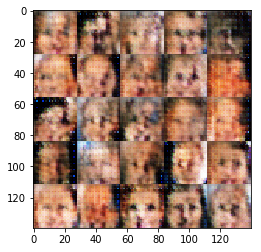


Epoch 1/1... Current Number of Steps in Epoch: 1110 Cumulative Steps for all Epochs: 1110 Discriminator Loss: 1.3418... Generator Loss: 0.8025 Sum Loss: 2.1443 Epoch Time: 472.4606943130493seconds

Epoch 1/1... Current Number of Steps in Epoch: 1120 Cumulative Steps for all Epochs: 1120 Discriminator Loss: 1.3124... Generator Loss: 0.7984 Sum Loss: 2.1108 Epoch Time: 476.61757922172546seconds

Epoch 1/1... Current Number of Steps in Epoch: 1130 Cumulative Steps for all Epochs: 1130 Discriminator Loss: 1.3522... Generator Loss: 0.7539 Sum Loss: 2.1061 Epoch Time: 480.7615056037903seconds

Epoch 1/1... Current Number of Steps in Epoch: 1140 Cumulative Steps for all Epochs: 1140 Discriminator Loss: 1.3158... Generator Loss: 0.8318 Sum Loss: 2.1476 Epoch Time: 485.2325551509857seconds

Epoch 1/1... Current Number of Steps in Epoch: 1150 Cumulative Steps for all Epochs: 1150 Discriminator Loss: 1.3336... Generator Loss: 0.7916 Sum Loss: 2.1251 Epoch Time: 489.5918960571289seconds

Epoch 1/

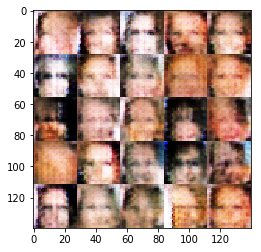


Epoch 1/1... Current Number of Steps in Epoch: 1210 Cumulative Steps for all Epochs: 1210 Discriminator Loss: 1.3389... Generator Loss: 0.7856 Sum Loss: 2.1246 Epoch Time: 514.352703332901seconds

Epoch 1/1... Current Number of Steps in Epoch: 1220 Cumulative Steps for all Epochs: 1220 Discriminator Loss: 1.3473... Generator Loss: 0.8059 Sum Loss: 2.1532 Epoch Time: 518.2263486385345seconds

Epoch 1/1... Current Number of Steps in Epoch: 1230 Cumulative Steps for all Epochs: 1230 Discriminator Loss: 1.3321... Generator Loss: 0.7794 Sum Loss: 2.1115 Epoch Time: 522.1348986625671seconds

Epoch 1/1... Current Number of Steps in Epoch: 1240 Cumulative Steps for all Epochs: 1240 Discriminator Loss: 1.3573... Generator Loss: 0.7771 Sum Loss: 2.1344 Epoch Time: 526.0773611068726seconds

Epoch 1/1... Current Number of Steps in Epoch: 1250 Cumulative Steps for all Epochs: 1250 Discriminator Loss: 1.3398... Generator Loss: 0.8038 Sum Loss: 2.1436 Epoch Time: 529.982919216156seconds

Epoch 1/1..

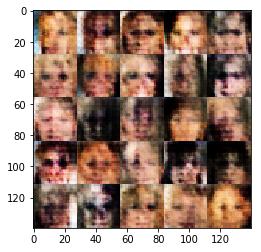


Epoch 1/1... Current Number of Steps in Epoch: 1310 Cumulative Steps for all Epochs: 1310 Discriminator Loss: 1.2189... Generator Loss: 0.8551 Sum Loss: 2.0740 Epoch Time: 558.0169773101807seconds

Epoch 1/1... Current Number of Steps in Epoch: 1320 Cumulative Steps for all Epochs: 1320 Discriminator Loss: 1.3436... Generator Loss: 0.7821 Sum Loss: 2.1257 Epoch Time: 562.6615617275238seconds

Epoch 1/1... Current Number of Steps in Epoch: 1330 Cumulative Steps for all Epochs: 1330 Discriminator Loss: 1.3551... Generator Loss: 0.7918 Sum Loss: 2.1470 Epoch Time: 567.4328076839447seconds

Epoch 1/1... Current Number of Steps in Epoch: 1340 Cumulative Steps for all Epochs: 1340 Discriminator Loss: 1.3534... Generator Loss: 0.7744 Sum Loss: 2.1279 Epoch Time: 572.025529384613seconds

Epoch 1/1... Current Number of Steps in Epoch: 1350 Cumulative Steps for all Epochs: 1350 Discriminator Loss: 1.3197... Generator Loss: 0.7699 Sum Loss: 2.0896 Epoch Time: 576.3901634216309seconds

Epoch 1/1.

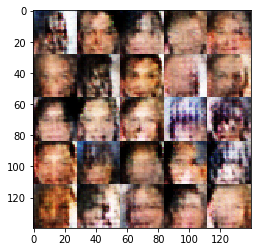


Epoch 1/1... Current Number of Steps in Epoch: 1410 Cumulative Steps for all Epochs: 1410 Discriminator Loss: 1.3047... Generator Loss: 0.8049 Sum Loss: 2.1096 Epoch Time: 600.811028957367seconds

Epoch 1/1... Current Number of Steps in Epoch: 1420 Cumulative Steps for all Epochs: 1420 Discriminator Loss: 1.4016... Generator Loss: 0.7756 Sum Loss: 2.1772 Epoch Time: 605.3389799594879seconds

Epoch 1/1... Current Number of Steps in Epoch: 1430 Cumulative Steps for all Epochs: 1430 Discriminator Loss: 1.3412... Generator Loss: 0.7880 Sum Loss: 2.1292 Epoch Time: 609.4494638442993seconds

Epoch 1/1... Current Number of Steps in Epoch: 1440 Cumulative Steps for all Epochs: 1440 Discriminator Loss: 1.3565... Generator Loss: 0.8090 Sum Loss: 2.1656 Epoch Time: 613.4243628978729seconds

Epoch 1/1... Current Number of Steps in Epoch: 1450 Cumulative Steps for all Epochs: 1450 Discriminator Loss: 1.3003... Generator Loss: 0.8432 Sum Loss: 2.1435 Epoch Time: 617.3768796920776seconds

Epoch 1/1.

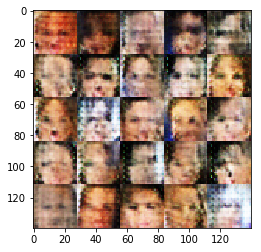


Epoch 1/1... Current Number of Steps in Epoch: 1510 Cumulative Steps for all Epochs: 1510 Discriminator Loss: 1.3841... Generator Loss: 0.7878 Sum Loss: 2.1719 Epoch Time: 642.5159914493561seconds

Epoch 1/1... Current Number of Steps in Epoch: 1520 Cumulative Steps for all Epochs: 1520 Discriminator Loss: 1.3525... Generator Loss: 0.7950 Sum Loss: 2.1475 Epoch Time: 646.4414989948273seconds

Epoch 1/1... Current Number of Steps in Epoch: 1530 Cumulative Steps for all Epochs: 1530 Discriminator Loss: 1.3821... Generator Loss: 0.7330 Sum Loss: 2.1151 Epoch Time: 650.506758928299seconds

Epoch 1/1... Current Number of Steps in Epoch: 1540 Cumulative Steps for all Epochs: 1540 Discriminator Loss: 1.3374... Generator Loss: 0.7858 Sum Loss: 2.1232 Epoch Time: 654.7504105567932seconds

Epoch 1/1... Current Number of Steps in Epoch: 1550 Cumulative Steps for all Epochs: 1550 Discriminator Loss: 1.2905... Generator Loss: 0.8291 Sum Loss: 2.1197 Epoch Time: 659.0140461921692seconds

Epoch 1/1.

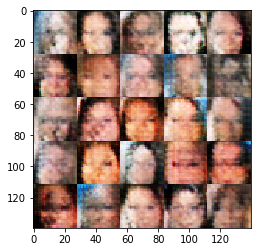


Epoch 1/1... Current Number of Steps in Epoch: 1610 Cumulative Steps for all Epochs: 1610 Discriminator Loss: 1.3449... Generator Loss: 0.8017 Sum Loss: 2.1466 Epoch Time: 683.839103937149seconds

Epoch 1/1... Current Number of Steps in Epoch: 1620 Cumulative Steps for all Epochs: 1620 Discriminator Loss: 1.3890... Generator Loss: 0.7023 Sum Loss: 2.0913 Epoch Time: 687.7402143478394seconds

Epoch 1/1... Current Number of Steps in Epoch: 1630 Cumulative Steps for all Epochs: 1630 Discriminator Loss: 1.4036... Generator Loss: 0.7619 Sum Loss: 2.1655 Epoch Time: 691.7675247192383seconds

Epoch 1/1... Current Number of Steps in Epoch: 1640 Cumulative Steps for all Epochs: 1640 Discriminator Loss: 1.3009... Generator Loss: 0.8056 Sum Loss: 2.1065 Epoch Time: 695.6920330524445seconds

Epoch 1/1... Current Number of Steps in Epoch: 1650 Cumulative Steps for all Epochs: 1650 Discriminator Loss: 1.2794... Generator Loss: 0.8229 Sum Loss: 2.1023 Epoch Time: 699.6061489582062seconds

Epoch 1/1.

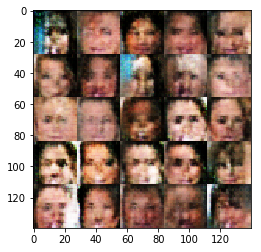


Epoch 1/1... Current Number of Steps in Epoch: 1710 Cumulative Steps for all Epochs: 1710 Discriminator Loss: 1.3651... Generator Loss: 0.7613 Sum Loss: 2.1264 Epoch Time: 723.4201803207397seconds

Epoch 1/1... Current Number of Steps in Epoch: 1720 Cumulative Steps for all Epochs: 1720 Discriminator Loss: 1.3980... Generator Loss: 0.7566 Sum Loss: 2.1546 Epoch Time: 727.3696281909943seconds

Epoch 1/1... Current Number of Steps in Epoch: 1730 Cumulative Steps for all Epochs: 1730 Discriminator Loss: 1.3784... Generator Loss: 0.7646 Sum Loss: 2.1430 Epoch Time: 731.3590431213379seconds

Epoch 1/1... Current Number of Steps in Epoch: 1740 Cumulative Steps for all Epochs: 1740 Discriminator Loss: 1.3816... Generator Loss: 0.7811 Sum Loss: 2.1627 Epoch Time: 735.2406661510468seconds

Epoch 1/1... Current Number of Steps in Epoch: 1750 Cumulative Steps for all Epochs: 1750 Discriminator Loss: 1.3329... Generator Loss: 0.7834 Sum Loss: 2.1163 Epoch Time: 739.2453525066376seconds

Epoch 1/1

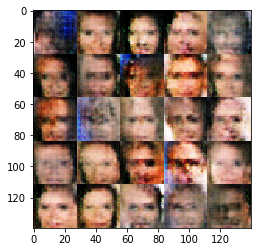


Epoch 1/1... Current Number of Steps in Epoch: 1810 Cumulative Steps for all Epochs: 1810 Discriminator Loss: 1.3781... Generator Loss: 0.7368 Sum Loss: 2.1149 Epoch Time: 763.4429557323456seconds

Epoch 1/1... Current Number of Steps in Epoch: 1820 Cumulative Steps for all Epochs: 1820 Discriminator Loss: 1.3365... Generator Loss: 0.8143 Sum Loss: 2.1508 Epoch Time: 767.3797521591187seconds

Epoch 1/1... Current Number of Steps in Epoch: 1830 Cumulative Steps for all Epochs: 1830 Discriminator Loss: 1.3527... Generator Loss: 0.8207 Sum Loss: 2.1733 Epoch Time: 771.3263278007507seconds

Epoch 1/1... Current Number of Steps in Epoch: 1840 Cumulative Steps for all Epochs: 1840 Discriminator Loss: 1.3767... Generator Loss: 0.7901 Sum Loss: 2.1668 Epoch Time: 775.258825302124seconds

Epoch 1/1... Current Number of Steps in Epoch: 1850 Cumulative Steps for all Epochs: 1850 Discriminator Loss: 1.3730... Generator Loss: 0.7704 Sum Loss: 2.1434 Epoch Time: 779.1858456134796seconds

Epoch 1/1.

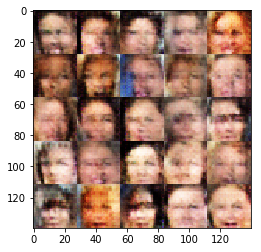


Epoch 1/1... Current Number of Steps in Epoch: 1910 Cumulative Steps for all Epochs: 1910 Discriminator Loss: 1.3657... Generator Loss: 0.7951 Sum Loss: 2.1607 Epoch Time: 802.94300532341seconds

Epoch 1/1... Current Number of Steps in Epoch: 1920 Cumulative Steps for all Epochs: 1920 Discriminator Loss: 1.3895... Generator Loss: 0.7621 Sum Loss: 2.1517 Epoch Time: 806.8661477565765seconds

Epoch 1/1... Current Number of Steps in Epoch: 1930 Cumulative Steps for all Epochs: 1930 Discriminator Loss: 1.3688... Generator Loss: 0.8302 Sum Loss: 2.1990 Epoch Time: 810.8050293922424seconds

Epoch 1/1... Current Number of Steps in Epoch: 1940 Cumulative Steps for all Epochs: 1940 Discriminator Loss: 1.2961... Generator Loss: 0.8102 Sum Loss: 2.1063 Epoch Time: 814.711254119873seconds

Epoch 1/1... Current Number of Steps in Epoch: 1950 Cumulative Steps for all Epochs: 1950 Discriminator Loss: 1.3390... Generator Loss: 0.8377 Sum Loss: 2.1767 Epoch Time: 818.6121485233307seconds

Epoch 1/1...

In [2]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.get_default_graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.